# SQL Project
You were hired by Ironhack to perform an Analytics Consulting Project entitled: competitive landscape.

Your mission is to create and populate an appropriate database with many coding schools that are our competition, as well as design an suitable queries that answer business questions of interest (to be defined by you)


**Suggested Steps in the Project:**


*   Read this notebook and understand each function. Comment the code appropriately

*   Populate the list of schools with a wider variety of schools (how are you going to get the school ID?)

* Take a look at the obtained dataframes. What dimensions do you have? what keys do you have? how could the different dataframes be connected?

* Go back to the drawing board and try to create an entity relationship diagram for tables available

* Once you have the schemas you want, you will need to:
  - create the suitable SQL queries to create the tables and populate them
  - run these queries using the appropriate Python connectors
  
* Bonus: How will this datamodel be updated in the future? Please write auxiliary functions that test the database for data quality issues. For example: how could you make sure you only include the most recent comments when you re-run the script?


# Suggested Deliverables

* 5-6 minute presentation of data model created, decision process and business analysis proposed

* exported .sql file with the final schema

* Supporting python files used to generate all logic

* High level documentation explaining tables designed and focusing on update methods

Crucial hint: check out the following tutorial:
https://www.dataquest.io/blog/sql-insert-tutorial/


# SwithUp scrapper

In [1]:
# you must populate this dict with the schools required -> try talking to the teaching team about this

schools = {'ironhack' : 10828,'app-academy' : 10525,'springboard' : 11035,'le-wagon' : 10868, 
    'general-assembly':10761,'brainstation': 10571,'flatiron-school': 10748,'4geeks-academy': 10492,
    'academia-de-codigo':10494,'wild-code-school':11169,'edit-disruptive-digital-education':10731,
    'nuclio-digital-school':11509,'neoland':10906,'la-capsule':10853,'careerfoundry':10581,'neue-fische': 11753,
    'spiced-academy': 11034,'brainstation':10571,'nucamp':10923,'shecodes':11014}

import re
import pandas as pd
from pandas.io.json import json_normalize
import requests



def get_comments_school(school):
    TAG_RE = re.compile(r'<[^>]+>')
    # defines url to make api call to data -> dynamic with school if you want to scrape competition
    url = "https://www.switchup.org/chimera/v1/school-review-list?mainTemplate=school-review-list&path=%2Fbootcamps%2F" + school + "&isDataTarget=false&page=3&perPage=10000&simpleHtml=true&truncationLength=250"
    #makes get request and converts answer to json
    # url defines the page of all the information, request is made, and information is returned to data variable
    data = requests.get(url).json()
    #converts json to dataframe
    reviews =  pd.DataFrame(data['content']['reviews'])
    #aux function to apply regex and remove tags
    def remove_tags(x):
        return TAG_RE.sub('',x)
    if 'body' in reviews.columns:
        reviews['review_body'] = reviews['body'].apply(remove_tags)
    else:
    # Handle the case when 'body' column is missing
        reviews['review_body'] = None  # Or any other default value
    reviews['school'] = school
    return reviews

In [2]:
# could you write this as a list comprehension? ;)
comments = []

for school in schools.keys():
    print(school)
    comments.append(get_comments_school(school))

comments = pd.concat(comments)

ironhack
app-academy
springboard
le-wagon
general-assembly
brainstation
flatiron-school
4geeks-academy
academia-de-codigo
wild-code-school
edit-disruptive-digital-education
nuclio-digital-school
neoland
la-capsule
careerfoundry
neue-fische
spiced-academy
nucamp
shecodes


In [3]:
display(comments)

print(comments.dtypes)

id             name anonymous hostProgramName  graduatingYear  \
0     306372.0    Sergio Burgos     False            None          2023.0   
1     306215.0        Anonymous      True            None          2023.0   
2     306068.0        Anonymous      True            None          2023.0   
3     305297.0      Utku Cikmaz     False            None          2023.0   
4     305278.0     Nirmal Hodge     False            None          2023.0   
...        ...              ...       ...             ...             ...   
1400  250876.0   Sara Guerreiro     False            None          2019.0   
1401  251528.0    Carmo Andrade     False            None          2019.0   
1402  251115.0           Ângela     False            None          2019.0   
1403  251215.0  Natalya Yarkova     False            None          2019.0   
1404  247227.0        Anonymous      True            None          2019.0   

     isAlumni                        jobTitle  \
0       False        International Negotiator   
1        True                                   
2       False          Full stack development   
3       False        Full Stack Web Developer   
4       False                Product Designer   
...       ...                             ...   
1400     True  Event Marketing and Management   
1401     True                Graphic Designer   
1402     True             Mathematics Student   
1403     True                            None   
1404     True                            None   

                                                tagline  \
0                   The Most Intense Academic Challenge   
1        Transformative Experience: My Time at Ironhack   
2                                       Now I can do it   
3                                           It was good   
4                               Ironhack 100% Worth It!   
...                                                 ...   
1400                           Life-changing experience   
1401  Two days and I'm already a professional developer   
1402            The best weekend to get you into Coding   
1403                     The best coding workshop ever!   
1404                      My great She Codes experience   

                                                   body  \
0     <span class="truncatable"><p></p><p>After comp...   
1     <span class="truncatable"><p></p><p>Pros: 1)In...   
2     <span class="truncatable"><p></p><p>7 months a...   
3     <span class="truncatable"><p></p><p>The course...   
4     <span class="truncatable"><p></p><p>I joined t...   
...                                                 ...   
1400  <span class="truncatable"><p>I came across She...   
1401  <span class="truncatable"><p>Two days at the S...   
1402  <span class="truncatable"><p>She Codes was an ...   
1403  <span class="truncatable"><p>Honestly, this wo...   
1404  <span class="truncatable"><p>If you're looking...   

                                                rawBody  ...   queryDate  \
0     <p>After completing my Data Analytics Bootcamp...  ...  2023-11-10   
1     <p>Pros: 1)Intensive Learning 2)Real-World Pro...  ...  2023-11-06   
2     <p>7 months ago, I only had an idea about html...  ...  2023-10-31   
3     <p>The course was great. Especially, Luis is a...  ...  2023-10-02   
4     <p>I joined the UX/ UI Bootcamp and to be hone...  ...  2023-09-30   
...                                                 ...  ...         ...   
1400  I came across She Codes when trying unsuccessf...  ...  2019-06-12   
1401  Two days at the SheCodes workshop and I'm alre...  ...  2019-06-12   
1402  She Codes was an awesome experience! With a fa...  ...  2019-06-11   
1403  Honestly, this workshop is amazing! It helps w...  ...  2019-06-06   
1404  If you're looking for a good introduction to t...  ...  2019-03-28   

                       program             user overallScore comments overall  \
0      Data Analytics Bootcamp  {'image': None}          3.3       []     3.0   
1    

id                 float64
name                object
anonymous           object
hostProgramName     object
graduatingYear     float64
isAlumni            object
jobTitle            object
tagline             object
body                object
rawBody             object
createdAt           object
queryDate           object
program             object
user                object
overallScore        object
comments            object
overall             object
curriculum          object
jobSupport          object
review_body         object
school              object
dtype: object


In [4]:
!pip install beautifulsoup4

import pandas as pd
from bs4 import BeautifulSoup

# Assuming your DataFrame is named 'df'
comments['review_body'] = comments['review_body'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/2440805391.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  comments['review_body'] = comments['review_body'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


In [5]:
comments.columns


Index(['id', 'name', 'anonymous', 'hostProgramName', 'graduatingYear',
       'isAlumni', 'jobTitle', 'tagline', 'body', 'rawBody', 'createdAt',
       'queryDate', 'program', 'user', 'overallScore', 'comments', 'overall',
       'curriculum', 'jobSupport', 'review_body', 'school'],
      dtype='object')

In [6]:
# Remove useless columns
columns_to_remove = ['name', 'anonymous', 'hostProgramName', 'isAlumni', 'jobTitle', 'rawBody', 'queryDate', 'user']

# Drop the specified columns
comments = comments.drop(columns=columns_to_remove)
display(comments)

id  graduatingYear  \
0     306372.0          2023.0   
1     306215.0          2023.0   
2     306068.0          2023.0   
3     305297.0          2023.0   
4     305278.0          2023.0   
...        ...             ...   
1400  250876.0          2019.0   
1401  251528.0          2019.0   
1402  251115.0          2019.0   
1403  251215.0          2019.0   
1404  247227.0          2019.0   

                                                tagline  \
0                   The Most Intense Academic Challenge   
1        Transformative Experience: My Time at Ironhack   
2                                       Now I can do it   
3                                           It was good   
4                               Ironhack 100% Worth It!   
...                                                 ...   
1400                           Life-changing experience   
1401  Two days and I'm already a professional developer   
1402            The best weekend to get you into Coding   
1403                     The best coding workshop ever!   
1404                      My great She Codes experience   

                                                   body   createdAt  \
0     <span class="truncatable"><p></p><p>After comp...  11/10/2023   
1     <span class="truncatable"><p></p><p>Pros: 1)In...   11/6/2023   
2     <span class="truncatable"><p></p><p>7 months a...  10/31/2023   
3     <span class="truncatable"><p></p><p>The course...   10/2/2023   
4     <span class="truncatable"><p></p><p>I joined t...   9/30/2023   
...                                                 ...         ...   
1400  <span class="truncatable"><p>I came across She...   6/12/2019   
1401  <span class="truncatable"><p>Two days at the S...   6/12/2019   
1402  <span class="truncatable"><p>She Codes was an ...   6/11/2019   
1403  <span class="truncatable"><p>Honestly, this wo...    6/6/2019   
1404  <span class="truncatable"><p>If you're looking...   3/28/2019   

                       program overallScore comments overall curriculum  \
0      Data Analytics Bootcamp          3.3       []     3.0        3.0   
1     Web Development Bootcamp          4.0       []     4.0        4.0   
2                         None          5.0       []     5.0        5.0   
3     Web Development Bootcamp          4.0       []     5.0        3.0   
4        UX/UI Design Bootcamp          5.0       []     5.0        5.0   
...                        ...          ...      ...     ...        ...   
1400                      None          5.0       []     5.0        5.0   
1401                  SheCodes          4.5       []     5.0        4.0   
1402                  SheCodes          3.7       []     5.0        5.0   
1403                  SheCodes          5.0       []     5.0        5.0   
1404             SheCodes Plus          5.0       []     5.0        5.0   

     jobSupport                                        review_body    school  
0           4.0  After completing my Data Analytics Bootcamp wi...  ironhack  
1           4.0  Pros: 1)Intensive Learning 2)Real-World Projec...  ironhack  
2           5.0  7 months ago, I only had an idea about html an...  ironhack  
3           4.0  The course was great. Especially, Luis is a gr...  ironhack  
4           5.0  I joined the UX/ UI Bootcamp and to be honest ...  ironhack  
...         ...                                                ...       ...  
1400        5.0  I came across She Codes when trying unsuccessf...  shecodes  
1401        NaN  Two days at the SheCodes workshop and I'm alre...  shecodes  
1402        1.0  She Codes was an awesome experience! With a fa...  shecodes  
1403        5.0  Honestly, this workshop is amazing! It helps w...  shecodes  
1404        NaN  If you're looking for a good introduction to t...  shecodes  

[11756 rows x 13 columns]

In [7]:
comments = comments.drop(columns=['body','createdAt'])
display(comments)

id  graduatingYear  \
0     306372.0          2023.0   
1     306215.0          2023.0   
2     306068.0          2023.0   
3     305297.0          2023.0   
4     305278.0          2023.0   
...        ...             ...   
1400  250876.0          2019.0   
1401  251528.0          2019.0   
1402  251115.0          2019.0   
1403  251215.0          2019.0   
1404  247227.0          2019.0   

                                                tagline  \
0                   The Most Intense Academic Challenge   
1        Transformative Experience: My Time at Ironhack   
2                                       Now I can do it   
3                                           It was good   
4                               Ironhack 100% Worth It!   
...                                                 ...   
1400                           Life-changing experience   
1401  Two days and I'm already a professional developer   
1402            The best weekend to get you into Coding   
1403                     The best coding workshop ever!   
1404                      My great She Codes experience   

                       program overallScore comments overall curriculum  \
0      Data Analytics Bootcamp          3.3       []     3.0        3.0   
1     Web Development Bootcamp          4.0       []     4.0        4.0   
2                         None          5.0       []     5.0        5.0   
3     Web Development Bootcamp          4.0       []     5.0        3.0   
4        UX/UI Design Bootcamp          5.0       []     5.0        5.0   
...                        ...          ...      ...     ...        ...   
1400                      None          5.0       []     5.0        5.0   
1401                  SheCodes          4.5       []     5.0        4.0   
1402                  SheCodes          3.7       []     5.0        5.0   
1403                  SheCodes          5.0       []     5.0        5.0   
1404             SheCodes Plus          5.0       []     5.0        5.0   

     jobSupport                                        review_body    school  
0           4.0  After completing my Data Analytics Bootcamp wi...  ironhack  
1           4.0  Pros: 1)Intensive Learning 2)Real-World Projec...  ironhack  
2           5.0  7 months ago, I only had an idea about html an...  ironhack  
3           4.0  The course was great. Especially, Luis is a gr...  ironhack  
4           5.0  I joined the UX/ UI Bootcamp and to be honest ...  ironhack  
...         ...                                                ...       ...  
1400        5.0  I came across She Codes when trying unsuccessf...  shecodes  
1401        NaN  Two days at the SheCodes workshop and I'm alre...  shecodes  
1402        1.0  She Codes was an awesome experience! With a fa...  shecodes  
1403        5.0  Honestly, this workshop is amazing! It helps w...  shecodes  
1404        NaN  If you're looking for a good introduction to t...  shecodes  

[11756 rows x 11 columns]

In [8]:
from pandas.io.json import json_normalize

def get_school_info(school, school_id):
    url = 'https://www.switchup.org/chimera/v1/bootcamp-data?mainTemplate=bootcamp-data%2Fdescription&path=%2Fbootcamps%2F'+ str(school) + '&isDataTarget=false&bootcampId='+ str(school_id) + '&logoTag=logo&truncationLength=250&readMoreOmission=...&readMoreText=Read%20More&readLessText=Read%20Less'

    data = requests.get(url).json()

    data.keys()

    courses = data['content']['courses']
    courses_df = pd.DataFrame(courses, columns= ['courses'])

    locations = data['content']['locations']
    locations_df = json_normalize(locations)

    badges_df = pd.DataFrame(data['content']['meritBadges'])

    website = data['content']['webaddr']
    description = data['content']['description']
    logoUrl = data['content']['logoUrl']
    school_df = pd.DataFrame([website,description,logoUrl]).T
    school_df.columns =  ['website','description','LogoUrl']
    reviews_df = data['content']['reviewMetric']


    locations_df['school'] = school
    courses_df['school'] = school
    badges_df['school'] = school
    school_df['school'] = school
    reviews_df['School'] = school


    locations_df['school_id'] = school_id
    courses_df['school_id'] = school_id
    badges_df['school_id'] = school_id
    school_df['school_id'] = school_id
    reviews_df['School_id'] = school_id

    return locations_df, courses_df, badges_df, school_df,reviews_df

locations_list = []
courses_list = []
badges_list = []
schools_list = []
reviews_list = []

for school, id in schools.items():
    print(school)
    a,b,c,d,e = get_school_info(school,id)

    locations_list.append(a)
    courses_list.append(b)
    badges_list.append(c)
    schools_list.append(d)
    reviews_list.append(e)

ironhack


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


app-academy


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


springboard


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


le-wagon


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


general-assembly


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


brainstation


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


flatiron-school


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


4geeks-academy


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


academia-de-codigo


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


wild-code-school


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


edit-disruptive-digital-education


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


nuclio-digital-school


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


neoland


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


la-capsule


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


careerfoundry


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


neue-fische


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


spiced-academy


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


nucamp


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


shecodes


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/4048392650.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


In [9]:
locations_switchup = pd.concat(locations_list)
locations_switchup

id                    description  country.id    country.name  \
0   15901                Berlin, Germany        57.0         Germany   
1   16022            Mexico City, Mexico        29.0          Mexico   
2   16086         Amsterdam, Netherlands        59.0     Netherlands   
3   16088              Sao Paulo, Brazil        42.0          Brazil   
4   16109                  Paris, France        38.0          France   
..    ...                            ...         ...             ...   
91  16906  Wilmington, DE, United States         1.0   United States   
92  16907          Wales, United Kingdom        11.0  United Kingdom   
0   16914                         Online         NaN             NaN   
1   16915               Lisbon, Portugal        28.0        Portugal   
2   16916                Porto, Portugal        28.0        Portugal   

   country.abbrev  city.id    city.name city.keyword  state.id state.name  \
0              DE  31156.0       Berlin       berlin       NaN        NaN   
1              MX  31175.0  Mexico City  mexico-city       NaN        NaN   
2              NL  31168.0    Amsterdam    amsterdam       NaN        NaN   
3              BR  31121.0    Sao Paulo    sao-paulo       NaN        NaN   
4              FR  31136.0        Paris        paris       NaN        NaN   
..            ...      ...          ...          ...       ...        ...   
91             US    774.0   Wilmington   wilmington       9.0   Delaware   
92             GB  31092.0        Wales        wales       NaN        NaN   
0             NaN      NaN          NaN          NaN       1.0     Online   
1              PT  31075.0       Lisbon       lisbon       NaN        NaN   
2              PT  31102.0        Porto        porto       NaN        NaN   

   state.abbrev state.keyword    school  school_id  
0           NaN           NaN  ironhack      10828  
1           NaN           NaN  ironhack      10828  
2           NaN           NaN  ironhack      10828  
3           NaN           NaN  ironhack      10828  
4           NaN           NaN  ironhack      10828  
..          ...           ...       ...        ...  
91           DE      delaware    nucamp      10923  
92          NaN           NaN    nucamp      10923  
0        Online        online  shecodes      11014  
1           NaN           NaN  shecodes      11014  
2           NaN           NaN  shecodes      11014  

[248 rows x 14 columns]

In [10]:
courses_switchup = pd.concat(courses_list)
courses_switchup.head(10)

courses       school  school_id
0               Cyber Security Bootcamp     ironhack      10828
1               Cybersecurity Part-Time     ironhack      10828
2               Data Analytics Bootcamp     ironhack      10828
3              Data Analytics Part-Time     ironhack      10828
4                 UX/UI Design Bootcamp     ironhack      10828
5                UX/UI Design Part-Time     ironhack      10828
6              Web Development Bootcamp     ironhack      10828
7             Web Development Part-Time     ironhack      10828
0  16-week Software Engineering Program  app-academy      10525
1                         Bootcamp Prep  app-academy      10525

In [11]:
badges_switchup = pd.concat(badges_list)
badges_switchup.head()

name            keyword  \
0   Available Online   available_online   
1  Verified Outcomes  verified_outcomes   
2   Flexible Classes   flexible_classes   
0   Available Online   available_online   
1   Flexible Classes   flexible_classes   

                                         description       school  school_id  
0          <p>School offers fully online courses</p>     ironhack      10828  
1  <p>School publishes a third-party verified out...     ironhack      10828  
2  <p>School offers part-time and evening classes...     ironhack      10828  
0          <p>School offers fully online courses</p>  app-academy      10525  
1  <p>School offers part-time and evening classes...  app-academy      10525

In [12]:
# any data cleaning still missing here? take a look at the description
schools_switchup = pd.concat(schools_list)
schools_switchup.head()

website  \
0                                www.ironhack.com/en   
0                                      appacademy.io   
0  www.springboard.com/?utm_source=switchup&utm_m...   
0                                    www.lewagon.com   
0  generalassemb.ly?utm_source=switchup&utm_mediu...   

                                         description  \
0  <span class="truncatable"><p>Ironhack is a glo...   
0  <span class="truncatable"><p>Founded in 2012, ...   
0  <span class="truncatable"><p>Springboard is an...   
0  <span class="truncatable"><p>Le Wagon is a glo...   
0  <span class="truncatable"><p>General Assembly ...   

                                             LogoUrl            school  \
0  https://d92mrp7hetgfk.cloudfront.net/images/si...          ironhack   
0  https://d92mrp7hetgfk.cloudfront.net/images/si...       app-academy   
0  https://d92mrp7hetgfk.cloudfront.net/images/si...       springboard   
0  https://d92mrp7hetgfk.cloudfront.net/images/si...          le-wagon   
0  https://d92mrp7hetgfk.cloudfront.net/images/si...  general-assembly   

   school_id  
0      10828  
0      10525  
0      11035  
0      10868  
0      10761

In [13]:
reviews_switchup = pd.DataFrame(reviews_list)
reviews_switchup

overallRating  reviewCount                             School  School_id
0            4.8         1285                           ironhack      10828
1           4.69         1198                        app-academy      10525
2           4.68         1559                        springboard      11035
3           4.98         2731                           le-wagon      10868
4           4.27          999                   general-assembly      10761
5           4.66          314                       brainstation      10571
6            4.6          266                    flatiron-school      10748
7           4.89          180                     4geeks-academy      10492
8            4.9          282                 academia-de-codigo      10494
9            4.8          100                   wild-code-school      11169
10           5.0            1  edit-disruptive-digital-education      10731
11          4.43            7              nuclio-digital-school      11509
12          4.77          182                            neoland      10906
13          4.98          332                         la-capsule      10853
14          4.46          183                      careerfoundry      10581
15           0.0            0                        neue-fische      11753
16           4.5           24                     spiced-academy      11034
17          4.75          707                             nucamp      10923
18          4.97         1405                           shecodes      11014

# Course Report Scrapping

In [14]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

def scrape_school_data(school, school_id):
    # Construct URL
    url = f'https://www.coursereport.com/schools/{school}'
    
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        html_content = response.text
        return extract_dataframes(html_content, school, school_id)
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None, None, None

def extract_dataframes(html_content, school, school_id):
    try:
        soup = BeautifulSoup(html_content, 'html.parser')

        # Extract course names
        course_titles = soup.find_all('h3', class_='font-semibold text-lg md:text-xl my-4 md:my-0')
        if course_titles:
            course_names = [title.get_text(strip=True) for title in course_titles]
        else:
            course_names = []

        # Extract number of reviews and remove the 'Reviews' part
        reviews_span = soup.find('span', class_='text-orange-dark font-semibold')
        if reviews_span:
            reviews_text = reviews_span.get_text(strip=True)
            reviews_count = re.search(r'\d+', reviews_text).group()
        else:
            reviews_count = None
        
        # Extract average rating
        average_rating_span = soup.find('span', text='Average Rating')
        if average_rating_span:
            rating = average_rating_span.find_next_sibling('span').get_text(strip=True)
        else:
            print("Average Rating not found.")

        # Extract locations
        locations_div = soup.find('div', class_='font-medium', text='Locations')
        if locations_div:
            # Traverse to the next <div> containing cities
            cities_div = locations_div.find_next('div')
            if cities_div:
                # Find <a> elements inside the cities_div
                cities = cities_div.find_all('a')
                if cities:
                    cities_list = [city.get_text(strip=True) for city in cities]
                else:
                    cities_list = []
            else:
                cities_list = []
        else:
            cities_list = []

        # Create dataframes
        courses_df = pd.DataFrame({'CourseName': course_names, 'School': school, 'SchoolID': school_id})
        locations_df = pd.DataFrame({'City': cities_list, 'School': school, 'SchoolID': school_id})
        reviews_df = pd.DataFrame({'Reviews': [reviews_count], 'Rating': [rating], 'School': [school], 'School_id': [school_id]})

        return courses_df, locations_df, reviews_df

    except Exception as e:
        print(f"Error during parsing: {e}")
        return None, None, None

# Example usage:
school_data_dict = {}

#Get the URL tag for the school, the id comes from SwitchUP
schools = {   
    'ironhack': 10828,
    'app-academy': 10525,
    'springboard': 11035,
    'le-wagon': 10868,
    'brainstation':10571,
    'nucamp':10923,
    'shecodes':11014,
    'general-assembly':10761,
    'flatiron-school': 10748,
    '4geeks-academy': 10492,
    'wild-code-school':11169,
    'edit-bootcamp':10731,
    'nuclio-school':11509,
    'neoland':10906,
    'la-capsule-academy':10853,
    'careerfoundry':10581,
    'neue-fische': 11753,
    'spiced-academy': 11034
}
for school, school_id in schools.items():
    courses_df, locations_df, reviews_df = scrape_school_data(school, school_id)
    school_data_dict[school] = {'Courses': courses_df, 'Locations': locations_df, 'Reviews': reviews_df}

# Print the dictionary
for school, dataframes in school_data_dict.items():
    print(f"\nSchool: {school}")
    print("Courses DataFrame:")
    print(dataframes['Courses'])

    print("\nLocations DataFrame:")
    print(dataframes['Locations'])
    
    print("\Reviews DataFrame:")
    print(dataframes['Reviews'])
    
    
    
# Create an empty dataframe to store the merged data
courses_coursereport = pd.DataFrame()
locations_coursereport = pd.DataFrame()
reviews_coursereport = pd.DataFrame()

# Iterate through the school_data_dict and merge the dataframes
for school, dataframes in school_data_dict.items():
    # Merge Courses DataFrames
    if dataframes['Courses'] is not None:
        courses_coursereport = pd.concat([courses_coursereport, dataframes['Courses']], ignore_index=True)

    # Merge Locations DataFrames
    if dataframes['Locations'] is not None:
        locations_coursereport = pd.concat([locations_coursereport, dataframes['Locations']], ignore_index=True)

    # Merge Reviews DataFrames
    if 'Reviews' in dataframes and dataframes['Reviews'] is not None:
        reviews_coursereport = pd.concat([reviews_coursereport, dataframes['Reviews']], ignore_index=True)

# Display the merged dataframes
print("\nMerged Courses DataFrame:")
print(courses_coursereport)

print("\nMerged Locations DataFrame:")
print(locations_coursereport)

print("\nMerged Reviews DataFrame:")
print(reviews_coursereport)


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/1686280663.py:41: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  average_rating_span = soup.find('span', text='Average Rating')
/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/1686280663.py:48: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  locations_div = soup.find('div', class_='font-medium', text='Locations')
/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/1686280663.py:41: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  average_rating_span = soup.find('span', text='Average Rating')
/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/1686280663.py:48: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  locations_div = soup.find('div', class_='font-medium', text='


School: ironhack
Courses DataFrame:
                             CourseName    School  SchoolID
0   Cyber Security Bootcamp (Full-time)  ironhack     10828
1   Cyber Security Bootcamp (Part-time)  ironhack     10828
2   Data Analytics Bootcamp (Full-time)  ironhack     10828
3   Data Analytics Bootcamp (Part-Time)  ironhack     10828
4     UX/UI Design Bootcamp (Full-Time)  ironhack     10828
5     UX/UI Design Bootcamp (Part-Time)  ironhack     10828
6  Web Development Bootcamp (Full-time)  ironhack     10828
7  Web Development Bootcamp (Part-Time)  ironhack     10828

Locations DataFrame:
        City    School  SchoolID
0  Amsterdam  ironhack     10828
1  Barcelona  ironhack     10828
2     Berlin  ironhack     10828
3     Lisbon  ironhack     10828
4     Madrid  ironhack     10828
5      Miami  ironhack     10828
6     Online  ironhack     10828
7      Paris  ironhack     10828
\Reviews DataFrame:
  Reviews Rating    School  School_id
0    1070   4.79  ironhack      10828

School:

/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/1686280663.py:41: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  average_rating_span = soup.find('span', text='Average Rating')
/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/1686280663.py:48: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  locations_div = soup.find('div', class_='font-medium', text='Locations')


In [15]:
display(locations_coursereport)
display(reviews_coursereport)
display(courses_coursereport)

City          School  SchoolID
0    Amsterdam        ironhack     10828
1    Barcelona        ironhack     10828
2       Berlin        ironhack     10828
3       Lisbon        ironhack     10828
4       Madrid        ironhack     10828
..         ...             ...       ...
144    Hamburg     neue-fische     11753
145     Munich     neue-fische     11753
146     Online     neue-fische     11753
147     Berlin  spiced-academy     11034
148     Online  spiced-academy     11034

[149 rows x 3 columns]

Reviews Rating              School  School_id
0     1070   4.79            ironhack      10828
1     1144   4.67         app-academy      10525
2     1511   4.63         springboard      11035
3     3064   4.96            le-wagon      10868
4     1930   4.67        brainstation      10571
5     1783   4.74              nucamp      10923
6     1316   4.97            shecodes      11014
7      661   4.29    general-assembly      10761
8      573   4.47     flatiron-school      10748
9      147   4.86      4geeks-academy      10492
10      91    4.9    wild-code-school      11169
11       1    4.0       edit-bootcamp      10731
12     176    4.6       nuclio-school      11509
13      48   4.81             neoland      10906
14     353   4.98  la-capsule-academy      10853
15    1469   4.68       careerfoundry      10581
16      18   4.06         neue-fische      11753
17     108   4.73      spiced-academy      11034

CourseName          School  SchoolID
0    Cyber Security Bootcamp (Full-time)        ironhack     10828
1    Cyber Security Bootcamp (Part-time)        ironhack     10828
2    Data Analytics Bootcamp (Full-time)        ironhack     10828
3    Data Analytics Bootcamp (Part-Time)        ironhack     10828
4      UX/UI Design Bootcamp (Full-Time)        ironhack     10828
..                                   ...             ...       ...
144                         Data Science  spiced-academy     11034
145           Full Stack Web Development  spiced-academy     11034
146           Full Stack Web Development  spiced-academy     11034
147           Full Stack Web Development  spiced-academy     11034
148           Full Stack Web Development  spiced-academy     11034

[149 rows x 3 columns]

## Data cleaning and manipulation

### Courses table

In [16]:
#Remove duplicates
courses_coursereport.drop_duplicates(subset=['CourseName', 'School', 'SchoolID'], inplace=True)
courses_switchup.drop_duplicates(subset=['courses', 'school', 'school_id'], inplace=True)

display(courses_coursereport)
display(courses_switchup)

CourseName          School  SchoolID
0    Cyber Security Bootcamp (Full-time)        ironhack     10828
1    Cyber Security Bootcamp (Part-time)        ironhack     10828
2    Data Analytics Bootcamp (Full-time)        ironhack     10828
3    Data Analytics Bootcamp (Part-Time)        ironhack     10828
4      UX/UI Design Bootcamp (Full-Time)        ironhack     10828
..                                   ...             ...       ...
138  Machine Learning Engineering Online     neue-fische     11753
139               Web Development Online     neue-fische     11753
140                       Data Analytics  spiced-academy     11034
141                         Data Science  spiced-academy     11034
145           Full Stack Web Development  spiced-academy     11034

[143 rows x 3 columns]

courses    school  school_id
0        Cyber Security Bootcamp  ironhack      10828
1        Cybersecurity Part-Time  ironhack      10828
2        Data Analytics Bootcamp  ironhack      10828
3       Data Analytics Part-Time  ironhack      10828
4          UX/UI Design Bootcamp  ironhack      10828
..                           ...       ...        ...
4   Web Development Fundamentals    nucamp      10923
0                SheCodes Basics  shecodes      11014
1                   SheCodes Max  shecodes      11014
2                  SheCodes Plus  shecodes      11014
3                   SheCodes Pro  shecodes      11014

[152 rows x 3 columns]

In [17]:
courses_coursereport[courses_coursereport['SchoolID']==11753]
courses_switchup[courses_switchup['school_id']==11753]

#We can take courses_switchup as reference, and let's add a a course_id column as primary key

courses_switchup['course_id'] = range(1, len(courses_switchup) + 1)

In [18]:
display(courses_switchup)

courses_switchup.reset_index(inplace=True)


courses    school  school_id  course_id
0        Cyber Security Bootcamp  ironhack      10828          1
1        Cybersecurity Part-Time  ironhack      10828          2
2        Data Analytics Bootcamp  ironhack      10828          3
3       Data Analytics Part-Time  ironhack      10828          4
4          UX/UI Design Bootcamp  ironhack      10828          5
..                           ...       ...        ...        ...
4   Web Development Fundamentals    nucamp      10923        148
0                SheCodes Basics  shecodes      11014        149
1                   SheCodes Max  shecodes      11014        150
2                  SheCodes Plus  shecodes      11014        151
3                   SheCodes Pro  shecodes      11014        152

[152 rows x 4 columns]

### Reviews table

In [19]:
# Renaming the columns in reviews_coursereport
reviews_coursereport = reviews_coursereport.rename(columns={'Rating': 'overallRating', 'Reviews': 'reviewCount'})

In [20]:
concatenated_df = pd.concat([reviews_coursereport, reviews_switchup])
concatenated_df



reviewCount overallRating                             School  School_id
0         1070          4.79                           ironhack      10828
1         1144          4.67                        app-academy      10525
2         1511          4.63                        springboard      11035
3         3064          4.96                           le-wagon      10868
4         1930          4.67                       brainstation      10571
5         1783          4.74                             nucamp      10923
6         1316          4.97                           shecodes      11014
7          661          4.29                   general-assembly      10761
8          573          4.47                    flatiron-school      10748
9          147          4.86                     4geeks-academy      10492
10          91           4.9                   wild-code-school      11169
11           1           4.0                      edit-bootcamp      10731
12         176           4.6                      nuclio-school      11509
13          48          4.81                            neoland      10906
14         353          4.98                 la-capsule-academy      10853
15        1469          4.68                      careerfoundry      10581
16          18          4.06                        neue-fische      11753
17         108          4.73                     spiced-academy      11034
0         1285           4.8                           ironhack      10828
1         1198          4.69                        app-academy      10525
2         1559          4.68                        springboard      11035
3         2731          4.98                           le-wagon      10868
4          999          4.27                   general-assembly      10761
5          314          4.66                       brainstation      10571
6          266           4.6                    flatiron-school      10748
7          180          4.89                     4geeks-academy      10492
8          282           4.9                 academia-de-codigo      10494
9          100           4.8                   wild-code-school      11169
10           1           5.0  edit-disruptive-digital-education      10731
11           7          4.43              nuclio-digital-school      11509
12         182          4.77                            neoland      10906
13         332          4.98                         la-capsule      10853
14         183          4.46                      careerfoundry      10581
15           0           0.0                        neue-fische      11753
16          24           4.5                     spiced-academy      11034
17         707          4.75                             nucamp      10923
18        1405          4.97                           shecodes      11014

In [21]:
concatenated_df['overallRating'] = pd.to_numeric(concatenated_df['overallRating'], errors='coerce')
concatenated_df['reviewCount'] = pd.to_numeric(concatenated_df['reviewCount'], errors='coerce')

In [22]:
reviews_aggregate = concatenated_df.groupby(by='School_id').agg({
    'overallRating': 'mean',
    'reviewCount': 'sum'
})

display(reviews_aggregate)
#Remove the index as school_id
reviews_aggregate.reset_index(inplace=True)

reviews_aggregate

overallRating  reviewCount
School_id                            
10492              4.875          327
10494              4.900          282
10525              4.680         2342
10571              4.665         2244
10581              4.570         1652
10731              4.500            2
10748              4.535          839
10761              4.280         1660
10828              4.795         2355
10853              4.980          685
10868              4.970         5795
10906              4.790          230
10923              4.745         2490
11014              4.970         2721
11034              4.615          132
11035              4.655         3070
11169              4.850          191
11509              4.515          183
11753              2.030           18

School_id  overallRating  reviewCount
0       10492          4.875          327
1       10494          4.900          282
2       10525          4.680         2342
3       10571          4.665         2244
4       10581          4.570         1652
5       10731          4.500            2
6       10748          4.535          839
7       10761          4.280         1660
8       10828          4.795         2355
9       10853          4.980          685
10      10868          4.970         5795
11      10906          4.790          230
12      10923          4.745         2490
13      11014          4.970         2721
14      11034          4.615          132
15      11035          4.655         3070
16      11169          4.850          191
17      11509          4.515          183
18      11753          2.030           18

### Locations table

In [23]:
display(locations_switchup)
display(locations_coursereport)

id                    description  country.id    country.name  \
0   15901                Berlin, Germany        57.0         Germany   
1   16022            Mexico City, Mexico        29.0          Mexico   
2   16086         Amsterdam, Netherlands        59.0     Netherlands   
3   16088              Sao Paulo, Brazil        42.0          Brazil   
4   16109                  Paris, France        38.0          France   
..    ...                            ...         ...             ...   
91  16906  Wilmington, DE, United States         1.0   United States   
92  16907          Wales, United Kingdom        11.0  United Kingdom   
0   16914                         Online         NaN             NaN   
1   16915               Lisbon, Portugal        28.0        Portugal   
2   16916                Porto, Portugal        28.0        Portugal   

   country.abbrev  city.id    city.name city.keyword  state.id state.name  \
0              DE  31156.0       Berlin       berlin       NaN        NaN   
1              MX  31175.0  Mexico City  mexico-city       NaN        NaN   
2              NL  31168.0    Amsterdam    amsterdam       NaN        NaN   
3              BR  31121.0    Sao Paulo    sao-paulo       NaN        NaN   
4              FR  31136.0        Paris        paris       NaN        NaN   
..            ...      ...          ...          ...       ...        ...   
91             US    774.0   Wilmington   wilmington       9.0   Delaware   
92             GB  31092.0        Wales        wales       NaN        NaN   
0             NaN      NaN          NaN          NaN       1.0     Online   
1              PT  31075.0       Lisbon       lisbon       NaN        NaN   
2              PT  31102.0        Porto        porto       NaN        NaN   

   state.abbrev state.keyword    school  school_id  
0           NaN           NaN  ironhack      10828  
1           NaN           NaN  ironhack      10828  
2           NaN           NaN  ironhack      10828  
3           NaN           NaN  ironhack      10828  
4           NaN           NaN  ironhack      10828  
..          ...           ...       ...        ...  
91           DE      delaware    nucamp      10923  
92          NaN           NaN    nucamp      10923  
0        Online        online  shecodes      11014  
1           NaN           NaN  shecodes      11014  
2           NaN           NaN  shecodes      11014  

[248 rows x 14 columns]

City          School  SchoolID
0    Amsterdam        ironhack     10828
1    Barcelona        ironhack     10828
2       Berlin        ironhack     10828
3       Lisbon        ironhack     10828
4       Madrid        ironhack     10828
..         ...             ...       ...
144    Hamburg     neue-fische     11753
145     Munich     neue-fische     11753
146     Online     neue-fische     11753
147     Berlin  spiced-academy     11034
148     Online  spiced-academy     11034

[149 rows x 3 columns]

In [24]:
#Rename columns
locations_coursereport.rename(columns={'City': 'city.name', 'School': 'school', 'SchoolID': 'school_id'}, inplace=True)


In [25]:
#Complete the info for course report based on switchup
mapped_coursereport = locations_coursereport.merge(locations_switchup[['city.name', 'city.id', 'country.name', 'country.id']], on='city.name', how='left')
#Check df
display(mapped_coursereport)
#Remove duplicates
mapped_coursereport = mapped_coursereport.drop_duplicates()
display(mapped_coursereport)

city.name          school  school_id  city.id country.name  country.id
0    Amsterdam        ironhack      10828  31168.0  Netherlands        59.0
1    Amsterdam        ironhack      10828  31168.0  Netherlands        59.0
2    Amsterdam        ironhack      10828  31168.0  Netherlands        59.0
3    Barcelona        ironhack      10828  31170.0        Spain        12.0
4    Barcelona        ironhack      10828  31170.0        Spain        12.0
..         ...             ...        ...      ...          ...         ...
360     Berlin  spiced-academy      11034  31156.0      Germany        57.0
361     Berlin  spiced-academy      11034  31156.0      Germany        57.0
362     Berlin  spiced-academy      11034  31156.0      Germany        57.0
363     Berlin  spiced-academy      11034  31156.0      Germany        57.0
364     Online  spiced-academy      11034      NaN          NaN         NaN

[365 rows x 6 columns]

city.name          school  school_id  city.id country.name  country.id
0    Amsterdam        ironhack      10828  31168.0  Netherlands        59.0
3    Barcelona        ironhack      10828  31170.0        Spain        12.0
9       Berlin        ironhack      10828  31156.0      Germany        57.0
15      Lisbon        ironhack      10828  31075.0     Portugal        28.0
22      Madrid        ironhack      10828  31052.0        Spain        12.0
..         ...             ...        ...      ...          ...         ...
353    Hamburg     neue-fische      11753  31222.0      Germany        57.0
355     Munich     neue-fische      11753  31158.0      Germany        57.0
357     Online     neue-fische      11753      NaN          NaN         NaN
358     Berlin  spiced-academy      11034  31156.0      Germany        57.0
364     Online  spiced-academy      11034      NaN          NaN         NaN

[154 rows x 6 columns]

In [26]:
#Get the columns that we want from Switchup
selected_columns = ['city.name', 'school', 'school_id', 'city.id', 'country.name', 'country.id']
locations_switchup2 = locations_switchup[selected_columns]

display(locations_switchup2)

city.name    school  school_id  city.id    country.name  country.id
0        Berlin  ironhack      10828  31156.0         Germany        57.0
1   Mexico City  ironhack      10828  31175.0          Mexico        29.0
2     Amsterdam  ironhack      10828  31168.0     Netherlands        59.0
3     Sao Paulo  ironhack      10828  31121.0          Brazil        42.0
4         Paris  ironhack      10828  31136.0          France        38.0
..          ...       ...        ...      ...             ...         ...
91   Wilmington    nucamp      10923    774.0   United States         1.0
92        Wales    nucamp      10923  31092.0  United Kingdom        11.0
0           NaN  shecodes      11014      NaN             NaN         NaN
1        Lisbon  shecodes      11014  31075.0        Portugal        28.0
2         Porto  shecodes      11014  31102.0        Portugal        28.0

[248 rows x 6 columns]

In [27]:
#Let's merge the two tables with the complete info

# Replace 'your_condition_columns' with the actual columns you want to use for checking duplicates
condition_columns = ['city.name', 'school', 'school_id', 'city.id', 'country.name', 'country.id']

# Concatenate the rows of both DataFrames
concatenated_df = pd.concat([locations_switchup2, mapped_coursereport])

# Remove rows with the same values in the specified columns
unique_rows_df = concatenated_df.drop_duplicates(subset=condition_columns)

In [28]:
#Drop cities with NaN city.name
unique_rows_df = unique_rows_df.dropna(subset=['city.name'])

display(unique_rows_df)

city.name          school  school_id  city.id country.name  country.id
0         Berlin        ironhack      10828  31156.0      Germany        57.0
1    Mexico City        ironhack      10828  31175.0       Mexico        29.0
2      Amsterdam        ironhack      10828  31168.0  Netherlands        59.0
3      Sao Paulo        ironhack      10828  31121.0       Brazil        42.0
4          Paris        ironhack      10828  31136.0       France        38.0
..           ...             ...        ...      ...          ...         ...
350       Bochum     neue-fische      11753      NaN          NaN         NaN
351      Cologne     neue-fische      11753  31254.0      Germany        57.0
355       Munich     neue-fische      11753  31158.0      Germany        57.0
357       Online     neue-fische      11753      NaN          NaN         NaN
364       Online  spiced-academy      11034      NaN          NaN         NaN

[281 rows x 6 columns]

In [29]:
display(unique_rows_df[unique_rows_df['country.name']=='Brazil'])

city.name    school  school_id  city.id country.name  country.id
3         Sao Paulo  ironhack      10828  31121.0       Brazil        42.0
6         Sao Paulo  le-wagon      10868  31121.0       Brazil        42.0
13  Rio de Janeiro   le-wagon      10868  31131.0       Brazil        42.0

In [30]:
unique_rows_df[unique_rows_df['city.id'].isna()][['city.name','country.name','country.id']]

city.name country.name  country.id
33           Online          NaN         NaN
38    New York City          NaN         NaN
39           Online          NaN         NaN
40           Online          NaN         NaN
109          Online          NaN         NaN
119  Rio de Janeiro          NaN         NaN
140   New York City          NaN         NaN
141          Online          NaN         NaN
163         Oakland          NaN         NaN
164          Online          NaN         NaN
165   Orange County          NaN         NaN
170            Reno          NaN         NaN
181        St. Paul          NaN         NaN
183      Washington          NaN         NaN
184          Online          NaN         NaN
190   New York City          NaN         NaN
191          Online          NaN         NaN
200   New York City          NaN         NaN
201          Online          NaN         NaN
214          Bogotá          NaN         NaN
258        Valencia          NaN         NaN
314          Online          NaN         NaN
349          Online          NaN         NaN
350          Bochum          NaN         NaN
357          Online          NaN         NaN
364          Online          NaN         NaN

In [31]:
# Define a mapping based on conditions
country_mapping = {
    'New York City': {'country.name': 'United States', 'country.id': 1.0},
    'Oakland': {'country.name': 'United States', 'country.id': 1.0},
    'St. Paul': {'country.name': 'United States', 'country.id': 1.0},
    'Orange County': {'country.name': 'United States', 'country.id': 1.0},
    'Munich': {'country.name': 'Germany', 'country.id': 47.0},
    'Cologne': {'country.name': 'Germany', 'country.id': 47.0},
    'Bochum': {'country.name': 'Germany', 'country.id': 47.0},
    'Lille': {'country.name': 'France', 'country.id': 38.0},
    'Lyon': {'country.name': 'France', 'country.id': 38.0},
    'Marseille': {'country.name': 'France', 'country.id': 38.0},
    'Monaco': {'country.name': 'France', 'country.id': 38.0},
    'Nice': {'country.name': 'France', 'country.id': 38.0},
    'Paris': {'country.name': 'France', 'country.id': 38.0},
    'Bordeaux': {'country.name': 'France', 'country.id': 38.0},
    'Madrid': {'country.name': 'Spain', 'country.id': 12.0},
    'Barcelona': {'country.name': 'Spain', 'country.id': 12.0},
    'Valencia': {'country.name': 'Spain', 'country.id': 12.0},
    'Lisbon': {'country.name': 'Portugal', 'country.id': 28.0},
    'Sidney': {'country.name': 'Australia', 'country.id': 20.0},
    'Rio de Janeiro':{'country.name': 'Brazil', 'country.id': 42.0},
    'Reno': {'country.name': 'United States', 'country.id': 1.0},
    'Washington': {'country.name': 'United States', 'country.id': 1.0},
    'Singapore': {'country.name': 'Singapore', 'country.id': 56.0},
    'Sydney': {'country.name': 'Australia', 'country.id': 20.0},
    'Brussels': {'country.name': 'Belgium', 'country.id': 46.0},
    'Bogotá': {'country.name': 'Colombia', 'country.id': 30.0},
}
# Apply the mapping to fill missing values
for city, mapping in country_mapping.items():
    mask = unique_rows_df['city.name'] == city
    unique_rows_df.loc[mask, ['country.name', 'country.id']] = mapping['country.name'], mapping['country.id']

# Display the resulting DataFrame
print(unique_rows_df)

       city.name          school  school_id  city.id country.name  country.id
0         Berlin        ironhack      10828  31156.0      Germany        57.0
1    Mexico City        ironhack      10828  31175.0       Mexico        29.0
2      Amsterdam        ironhack      10828  31168.0  Netherlands        59.0
3      Sao Paulo        ironhack      10828  31121.0       Brazil        42.0
4          Paris        ironhack      10828  31136.0       France        38.0
..           ...             ...        ...      ...          ...         ...
350       Bochum     neue-fische      11753      NaN      Germany        47.0
351      Cologne     neue-fische      11753  31254.0      Germany        47.0
355       Munich     neue-fische      11753  31158.0      Germany        47.0
357       Online     neue-fische      11753      NaN          NaN         NaN
364       Online  spiced-academy      11034      NaN          NaN         NaN

[281 rows x 6 columns]


In [32]:
# Create location_id 
unique_rows_df['location_id'] = range(1, len(unique_rows_df) + 1)

# Display the DataFrame with the new 'location_id' column
print(unique_rows_df)

       city.name          school  school_id  city.id country.name  country.id  \
0         Berlin        ironhack      10828  31156.0      Germany        57.0   
1    Mexico City        ironhack      10828  31175.0       Mexico        29.0   
2      Amsterdam        ironhack      10828  31168.0  Netherlands        59.0   
3      Sao Paulo        ironhack      10828  31121.0       Brazil        42.0   
4          Paris        ironhack      10828  31136.0       France        38.0   
..           ...             ...        ...      ...          ...         ...   
350       Bochum     neue-fische      11753      NaN      Germany        47.0   
351      Cologne     neue-fische      11753  31254.0      Germany        47.0   
355       Munich     neue-fische      11753  31158.0      Germany        47.0   
357       Online     neue-fische      11753      NaN          NaN         NaN   
364       Online  spiced-academy      11034      NaN          NaN         NaN   

     location_id  
0       

In [33]:
#Rename our location df
locations_aggregate=unique_rows_df

display(locations_aggregate)

city.name          school  school_id  city.id country.name  country.id  \
0         Berlin        ironhack      10828  31156.0      Germany        57.0   
1    Mexico City        ironhack      10828  31175.0       Mexico        29.0   
2      Amsterdam        ironhack      10828  31168.0  Netherlands        59.0   
3      Sao Paulo        ironhack      10828  31121.0       Brazil        42.0   
4          Paris        ironhack      10828  31136.0       France        38.0   
..           ...             ...        ...      ...          ...         ...   
350       Bochum     neue-fische      11753      NaN      Germany        47.0   
351      Cologne     neue-fische      11753  31254.0      Germany        47.0   
355       Munich     neue-fische      11753  31158.0      Germany        47.0   
357       Online     neue-fische      11753      NaN          NaN         NaN   
364       Online  spiced-academy      11034      NaN          NaN         NaN   

     location_id  
0              1  
1              2  
2              3  
3              4  
4              5  
..           ...  
350          277  
351          278  
355          279  
357          280  
364          281  

[281 rows x 7 columns]

## Wordcloud analysis to see trends in Courses from CourseReport and Switchup

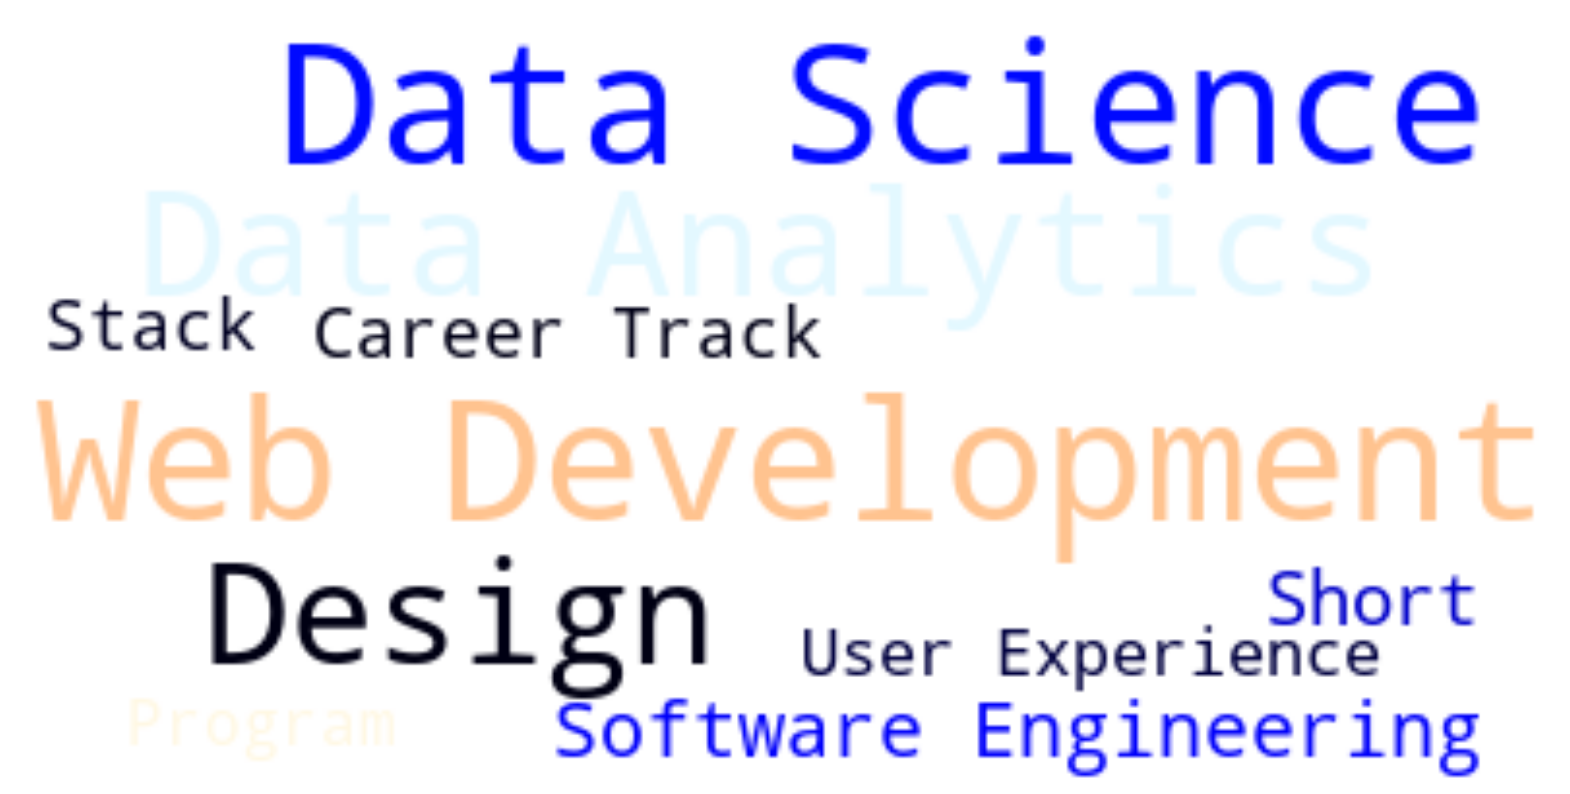

In [34]:
#Get wordcloud for the course from Course Report

text=courses_coursereport['CourseName'].str.cat(sep=' ')

#Set a stopword list for Course Report
!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


stopwords= set(STOPWORDS)
new_words = ['online','full-time','part-time','bootcamp','course','full','time','part','week']
new_stopwords=stopwords.union(new_words)


plt.rcParams["figure.figsize"] = (20,20)

# Make Wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white",stopwords=new_stopwords, colormap='flag').generate(text)

# Plot Wordcloud
plt.plot()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

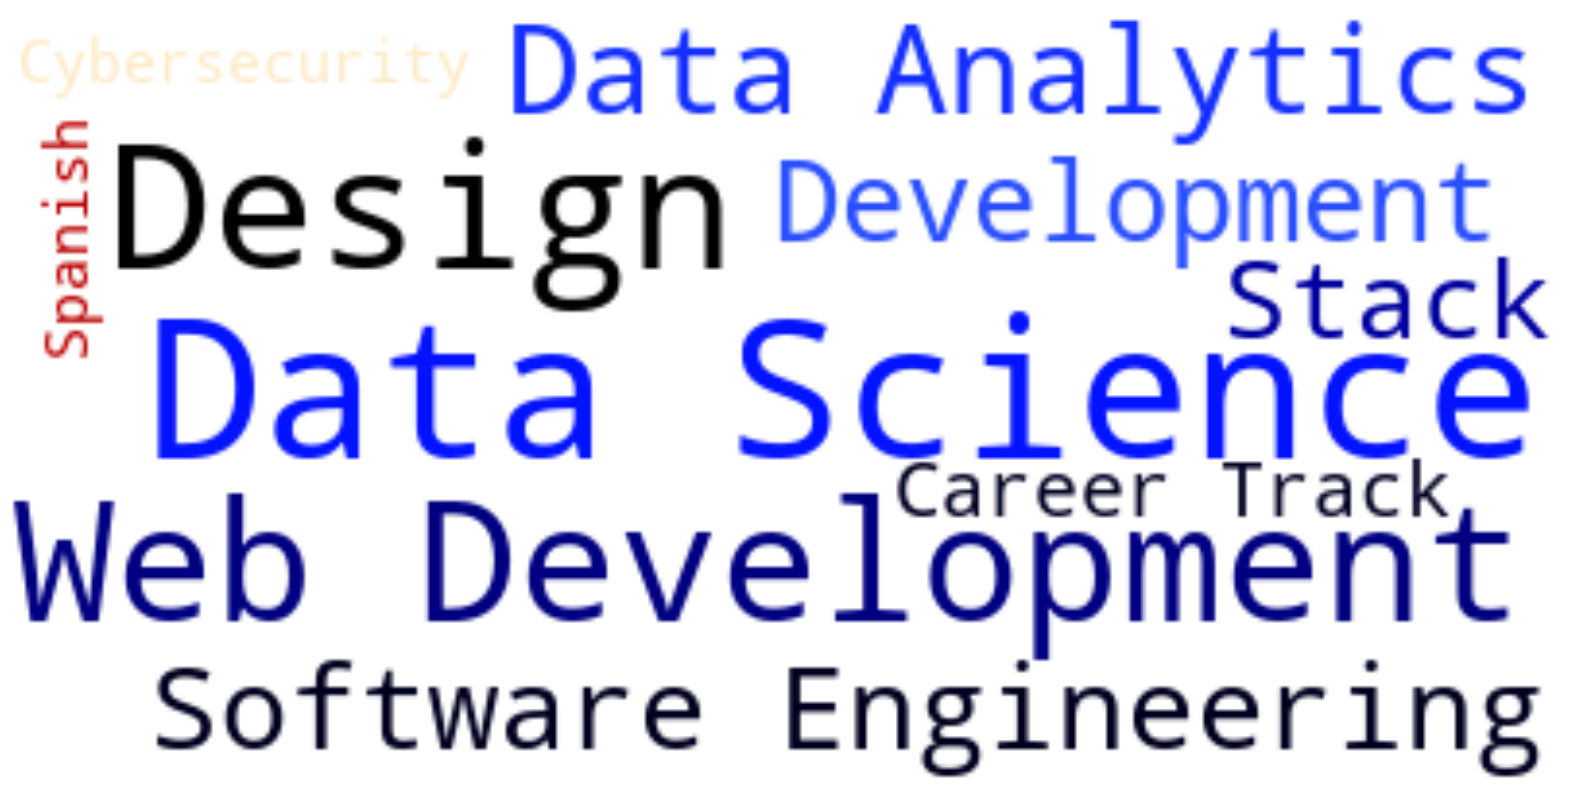

In [35]:
#Analyze 
text_switchup=courses_switchup['courses'].str.cat(sep=' ')
text_switchup

#Set a stopword list for Course Report
!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


stopwords= set(STOPWORDS)
new_words = ['online','full-time','part-time','bootcamp','course','full','time','part','week','short','program']
new_stopwords=stopwords.union(new_words)


plt.rcParams["figure.figsize"] = (20,20)

# Make Wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white",stopwords=new_stopwords, colormap='flag').generate(text_switchup)

# Plot Wordcloud
plt.plot()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Worldmap with Companies per country and Countries with Data Science course

In [36]:
import pandas as pd
import plotly.express as px

company_counts = locations_aggregate.groupby('country.name')['school'].nunique().reset_index()
company_counts.columns = ['Country', 'Company Count']

# Create a world map using Plotly Express
fig = px.choropleth(
    company_counts,
    locations='Country',
    locationmode='country names',
    color='Company Count',
    title='Bootcamp Companies Worldwide',
    color_continuous_scale='Viridis',
    labels={'Company Count': 'Number of Companies'}
)

# Show the plot
fig.show()

In [53]:
#Only Asia countries

import pandas as pd
import plotly.express as px

# List of Asian countries
asian_countries = ['China', 'India', 'Indonesia', 'Pakistan', 'Bangladesh', 'Japan', 'Philippines', 'Vietnam', 'Turkey', 'Iran']

# Filter the data to include only Asian countries
company_counts_asia = company_counts[company_counts['Country'].isin(asian_countries)]

# Create a world map using Plotly Express
fig = px.choropleth(
    company_counts_asia,
    locations='Country',
    locationmode='country names',
    color='Company Count',
    title='Bootcamp Companies in Asia',
    color_continuous_scale='Viridis',
    labels={'Company Count': 'Number of Companies'}
)

# Show the plot
fig.show()

In [54]:
import pandas as pd
import plotly.express as px

# List of European countries
european_countries = ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'Poland', 'Netherlands', 'Belgium', 'Greece', 'Sweden']

# Filter the data to include only European countries
company_counts_europe = company_counts[company_counts['Country'].isin(european_countries)]

# Create a world map using Plotly Express
fig = px.choropleth(
    company_counts_europe,
    locations='Country',
    locationmode='country names',
    color='Company Count',
    title='Bootcamp Companies in Europe',
    color_continuous_scale='Viridis',
    labels={'Company Count': 'Number of Companies'},
    color_continuous_midpoint=int(company_counts_europe['Company Count'].median()),  # Set midpoint for color scale
)

# Set legend to display only integer numbers
fig.update_layout(coloraxis_colorbar=dict(tickmode='linear', tick0=0, dtick=1))

# Show the plot
fig.show()


In [52]:
company_counts = locations_aggregate.groupby('country.name')['school'].nunique().reset_index()
company_counts.columns = ['Country', 'Company Count']

# Create a world map using Plotly Express
fig = px.choropleth(
    company_counts,
    locations='Country',
    locationmode='country names',
    color='Company Count',
    title='Bootcamp Companies Worldwide',
    color_continuous_scale='Viridis',
    labels={'Company Count': 'Number of Companies'}
)

# Show the plot
fig.show()

## Create tables in MySQL

In [38]:
#Create tables for SwitchUp and CourseReport

import mysql.connector
cnx = mysql.connector.connect(
    user='root',
    password='DAPT2023',
    database='ProjectSQL',
    port=3306,
    auth_plugin='mysql_native_password'
)
cursor = cnx.cursor()
print('MySQL connection established:', cnx.is_connected())

# SQL statements to create tables

create_reviews_aggregate_table = """
CREATE TABLE IF NOT EXISTS reviews_aggregate (
    school_id INT PRIMARY KEY,
    overallRating FLOAT,
    total_reviews FLOAT
);
"""

create_locations_aggregate_table = """
CREATE TABLE locations_aggregate (
    location_id INT PRIMARY KEY,
    city_name VARCHAR(52),
    school VARCHAR(32),
    school_id INT,
    country_id INT,
    country_name VARCHAR(52),
    city_id INT
);
"""

create_badges_switchup_table = """
CREATE TABLE IF NOT EXISTS badges_switchup (
    id INT AUTO_INCREMENT PRIMARY KEY,
    badge_name VARCHAR(255),
    school VARCHAR(255),
    school_id INT
);
"""

create_comments_table = """
CREATE TABLE IF NOT EXISTS comments (
    comment_id INT PRIMARY KEY,
    id FLOAT,
    graduatingYear FLOAT,
    tagline VARCHAR(1500),
    program VARCHAR(1500),
    overallScore FLOAT,
    comments VARCHAR(1500),
    overall FLOAT,
    curriculum FLOAT,
    jobSupport FLOAT,
    review_body VARCHAR(1500),
    school VARCHAR(500)
);
"""

create_schools_switchup_table = """
CREATE TABLE IF NOT EXISTS schools_switchup (
    id INT AUTO_INCREMENT PRIMARY KEY,
    website VARCHAR(255),
    description TEXT,
    logo_url VARCHAR(255),
    school VARCHAR(255),
    school_id INT
);
"""

create_courses_switchup_table = """
CREATE TABLE IF NOT EXISTS courses_switchup (
    courses_id INT AUTO_INCREMENT PRIMARY KEY,
    courses VARCHAR(255),
    school VARCHAR(255),
    school_id INT
);
"""

# Execute the SQL statements to create tables 
cursor.execute(create_reviews_aggregate_table)
cursor.execute(create_locations_aggregate_table)
cursor.execute(create_badges_switchup_table)
cursor.execute(create_comments_table)
cursor.execute(create_schools_switchup_table)
cursor.execute(create_courses_switchup_table)


# Commit the changes and close the connection
cnx.commit()
cnx.close()

MySQL connection established: True


ProgrammingError: 1050 (42S01): Table 'locations_aggregate' already exists

## Insert dataframes into MySQL

In [ ]:
#Switchup tables
import pandas as pd
from sqlalchemy import create_engine

# Assuming you have a DataFrame named 'locations'
# Replace NaN values with None
#locations_aggregate = locations.where(pd.notna(locations), None)

# Define database connection parameters
db_params = {
    'host': 'localhost',
    'user': 'root',
    'password': 'DAPT2023',
    'database': 'ProjectSQL'
}

# Create a SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{db_params['user']}:{db_params['password']}@{db_params['host']}/{db_params['database']}")

# Insert DataFrame into MySQL
locations_aggregate.to_sql(name='locations_aggregate', con=engine, if_exists='replace', index=False)
reviews_aggregate.to_sql(name='reviews_aggregate', con=engine, if_exists='replace', index=False)
schools_switchup.to_sql(name='schools_switchup', con=engine, if_exists='replace', index=False)
badges_switchup.to_sql(name='badges_switchup', con=engine, if_exists='replace', index=False)
courses_switchup.to_sql(name='courses_switchup', con=engine, if_exists='replace', index=False)
comments.to_sql(name='comments', con=engine, if_exists='replace', index=False)



# Close the engine
engine.dispose()

# Get insight from Reviews

In [ ]:
comments.iloc[0]['body']

In [ ]:
#Let's remove this HTML tags from the body column in the comments df
import pandas as pd
from bs4 import BeautifulSoup

# Assuming df is your DataFrame with a 'body' column
comments['body'] = comments['body'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# Now, the 'body' column contains text without HTML tags

In [ ]:
#Set a stopword list for Course Report
text_comments=comments['body'].str.cat(sep=' ')
text_comments


!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


stopwords= set(STOPWORDS)
new_words = ['read','bootcamp','course','less','week','one','lot']
new_stopwords=stopwords.union(new_words)


plt.rcParams["figure.figsize"] = (20,20)

# Make Wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white",stopwords=new_stopwords, colormap='flag').generate(text_comments)

# Plot Wordcloud
plt.plot()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

"""#Create tables for CourseReport
import mysql.connector
cnx = mysql.connector.connect(
    user='root',
    password='DAPT2023',
    database='CourseReport',
    port=3306,
    auth_plugin='mysql_native_password'
)
cursor = cnx.cursor()
print('MySQL connection established:', cnx.is_connected())

# SQL statements to create tables
create_locations_table = """
"""CREATE TABLE locations (
    id INT PRIMARY KEY,
    description VARCHAR(52),
    country_id INT,
    country_name VARCHAR(52),
    country_abbrev VARCHAR(20),
    city_id INT,
    city_name VARCHAR(32),
    city_keyword VARCHAR(32),
    state_id INT,
    state_name VARCHAR(32),
    state_abbrev VARCHAR(20),
    state_keyword VARCHAR(32),
    school VARCHAR(32),
    school_id INT
);
"""

#create_courses_table = """
CREATE TABLE IF NOT EXISTS courses (
    id INT AUTO_INCREMENT PRIMARY KEY,
    courses VARCHAR(255),
    school VARCHAR(255),
    school_id INT
);
"""
create_reviews_table = """
CREATE TABLE IF NOT EXISTS reviews (
    total_reviews FLOAT,
    overallRating FLOAT,
    school VARCHAR(255),
    school_id INT PRIMARY KEY
);
"""
# Execute the SQL statements to create tables
cursor.execute(create_locations_table)
cursor.execute(create_courses_table)
cursor.execute(create_reviews_table)

# Commit the changes and close the connection
cnx.commit()
cnx.close()"""

## Locations Analysis

In [ ]:
#In SQL I0'm deleting the rows with Description=Online
"""
SET SQL_SAFE_UPDATES = 0;

DELETE FROM locations_switchup
WHERE description = 'Online';
"""

In [ ]:
comments

## Data science average rating for 

#Course Report tables
import pandas as pd
from sqlalchemy import create_engine

# Assuming you have a DataFrame named 'locations'
# Replace NaN values with None
locations = locations.where(pd.notna(locations), None)

# Define database connection parameters
db_params = {
    'host': 'localhost',
    'user': 'root',
    'password': 'DAPT2023',
    'database': 'CourseReport'
}

# Create a SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{db_params['user']}:{db_params['password']}@{db_params['host']}/{db_params['database']}")

# Insert DataFrame into MySQL
course_report_merged_locations_df.to_sql(name='locations', con=engine, if_exists='replace', index=False)
course_report_merged_reviews_df.to_sql(name='reviews', con=engine, if_exists='replace', index=False)
course_report_merged_courses_df.to_sql(name='courses', con=engine, if_exists='replace', index=False)


# Close the engine
engine.dispose()

In [ ]:
unique_countries = locations_aggregate[['country_name', 'country_id']].drop_duplicates()

# Display the DataFrame with unique countries and their IDs
display(unique_countries)


In [ ]:
#Check average rating over time for DataScience programs

data_science_programs = comments[comments['program'].str.contains('Data Science', case=False, na=False)]

# Extract valid year values from 'graduatingYear' and convert to datetime
data_science_programs['graduatingYear'] = data_science_programs['graduatingYear'].apply(lambda x: pd.to_datetime(str(x), errors='coerce'))

# Convert 'overallScore' to numeric
data_science_programs['overallScore'] = pd.to_numeric(data_science_programs['overallScore'], errors='coerce')

# Group by 'graduatingYear' and calculate the average overall score
average_overall_score = data_science_programs.groupby('graduatingYear')['overallScore'].mean()

# Display the resulting Series
print(average_overall_score)


In [ ]:
import os
unique_countries = locations_switchup[['country.id', 'country.name']].drop_duplicates()

# Display the result
display(unique_countries)
unique_countries.to_csv()

unique_countries.to_csv('unique_countries.csv', index=False)

/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/1949609239.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



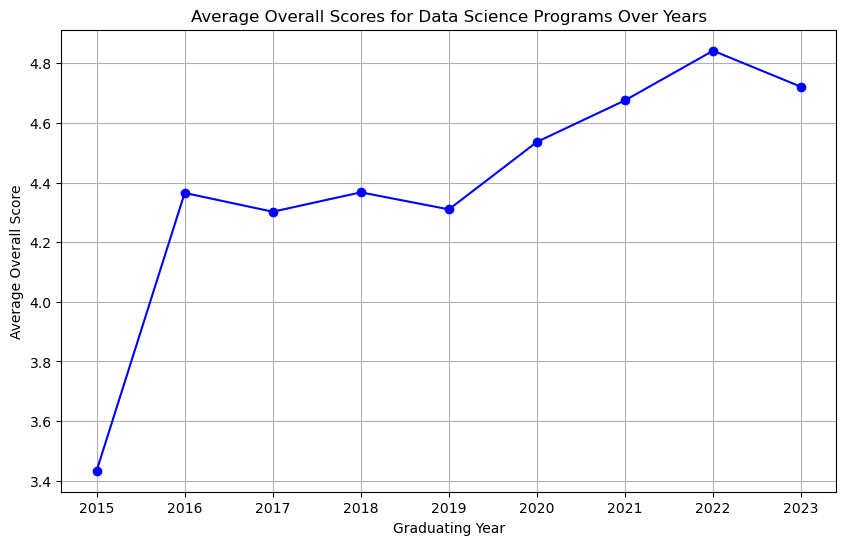

In [41]:
import matplotlib.pyplot as plt

# Filter rows with "Data Science" in the "program" column
data_science = comments[comments['program'].str.contains('Data Science', case=False, na=False)]

# Convert "overallScore" column to numeric
data_science['overallScore'] = pd.to_numeric(data_science['overallScore'], errors='coerce')

# Group by graduating year and calculate the average overall score
average_scores = data_science.groupby('graduatingYear')['overallScore'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_scores['graduatingYear'], average_scores['overallScore'], marker='o', color='blue')
plt.title('Average Overall Scores for Data Science Programs Over Years')
plt.xlabel('Graduating Year')
plt.ylabel('Average Overall Score')
plt.grid(True)
plt.show()

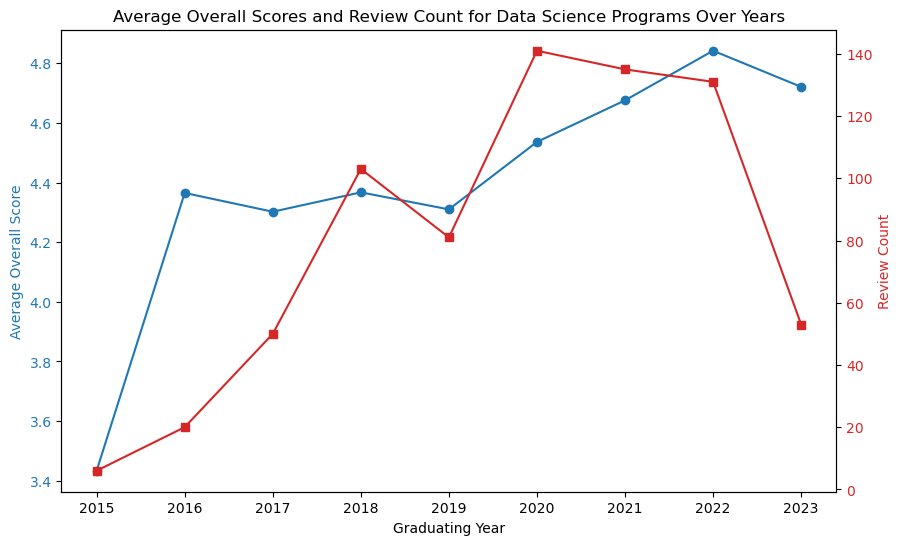

In [47]:
# Group by graduating year and calculate the average overall score and count of reviews
result = data_science.groupby('graduatingYear').agg({'overallScore': 'mean', 'id': 'count'}).reset_index()
result.rename(columns={'id': 'reviewCount'}, inplace=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average overall score
color = 'tab:blue'
ax1.set_xlabel('Graduating Year')
ax1.set_ylabel('Average Overall Score', color=color)
ax1.plot(result['graduatingYear'], result['overallScore'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot the review count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Review Count', color=color)
ax2.plot(result['graduatingYear'], result['reviewCount'], marker='s', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Overall Scores and Review Count for Data Science Programs Over Years')
plt.show()

In [48]:
locations_aggregate[(locations_aggregate['country.name'] == 'Sweden') | 
                     (locations_aggregate['country.name'] == 'Finland') | 
                     (locations_aggregate['country.name'] == 'Ireland')][['school', 'country.name']]


school country.name
11    4geeks-academy      Ireland
17  wild-code-school      Ireland
85            nucamp       Sweden

/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_19731/427862709.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



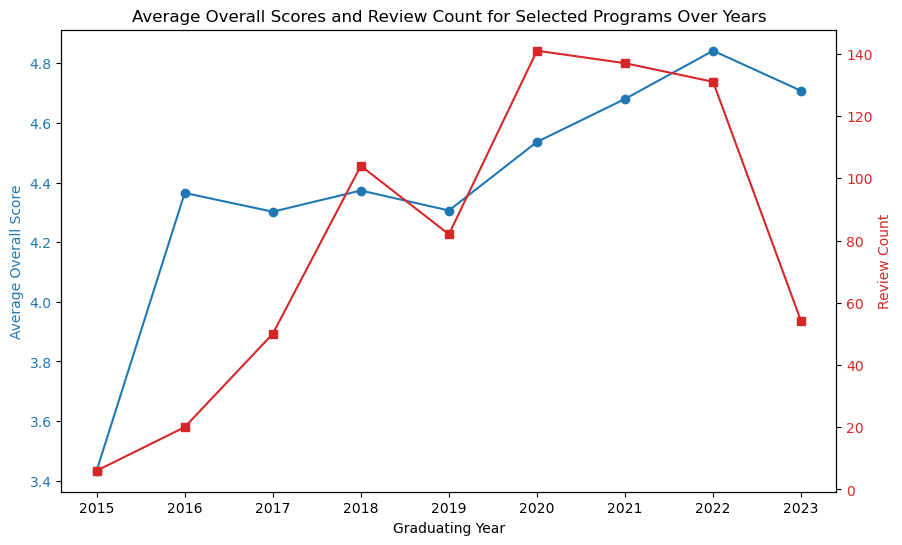

In [50]:
# Define a list of program keywords
program_keywords = ['Data Science', 'AI', 'Data Engineering']

# Filter rows with programs containing any of the specified keywords in the "program" column
selected_programs = comments[comments['program'].str.contains('|'.join(program_keywords), case=False, na=False)]

# Convert "overallScore" column to numeric
selected_programs['overallScore'] = pd.to_numeric(selected_programs['overallScore'], errors='coerce')

# Group by graduating year and calculate the average overall score and count of reviews
result = selected_programs.groupby('graduatingYear').agg({'overallScore': 'mean', 'id': 'count'}).reset_index()
result.rename(columns={'id': 'reviewCount'}, inplace=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average overall score
color = 'tab:blue'
ax1.set_xlabel('Graduating Year')
ax1.set_ylabel('Average Overall Score', color=color)
ax1.plot(result['graduatingYear'], result['overallScore'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot the review count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Review Count', color=color)
ax2.plot(result['graduatingYear'], result['reviewCount'], marker='s', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Overall Scores and Review Count for Selected Programs Over Years')
plt.show()

### Context & Objective

We have been hired by Ironhack,a global tech school, that have just raised 2M€ to advise them on how to grow their business


For this purpose, the questions to answer are:
 - Who are Ironhack main competitors and how is the bootcamp landscape?
 - What courses can we introduce to upgrade the offering? Their last course was introduced in 2020
 - To increase Ironhack footprint and growth, where Ironhack can expand their operations?

To make inform recommendations we need data, so we have taken the following sources for our decision making:
    
 - Course aggregators data: we have extracted with web scrapping techniques data from the 2 most relevant Bootcamp aggregators -Course Report and Switchup-. We have extracted data about each school, their reviews, ratings, programs, location, etc.

 - European countries data, including population, GDP, growth and tech skills demand
